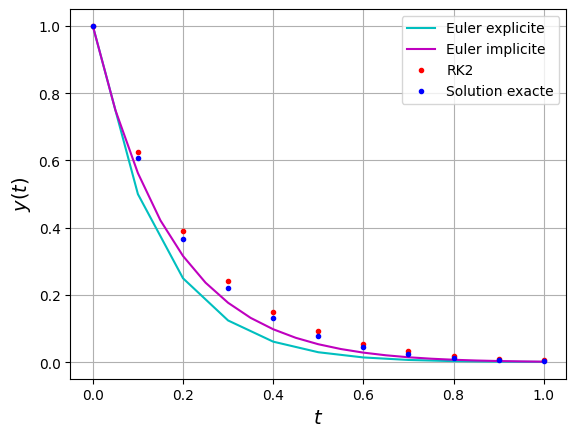

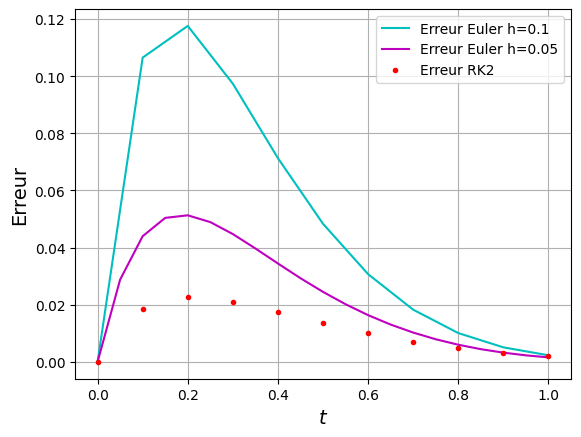

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return (t**3) * np.exp(-5*t) - (4*t**3 + 5) * y

def yExact(t):
    return (1/4) * (np.exp(t**4) + 3) * np.exp(-t * (t**3 + 5))

def fct_Euler(y0, tmin, tmax, step, fonction):
    t = np.arange(tmin, tmax + step, step)
    y = np.zeros(len(t))
    y[0] = y0

    for k in range(len(t) - 1):
        y[k+1] = y[k] + step * fonction(t[k], y[k])  # Fixed indexing

    return y, t

def fct_RK2(y0, tmin, tmax, pas, beta, fonction):
    t = np.arange(tmin, tmax + pas, pas)
    y = np.zeros(len(t))
    y[0] = y0

    for k in range(len(t) - 1):
        k1 = fonction(t[k], y[k])
        k2 = fonction(t[k] + pas / (2 * beta), y[k] + (pas * k1) / (2 * beta))
        y[k+1] = y[k] + pas * ((1 - beta) * k1 + beta * k2)

    return y, t

# Condition initiale
y0 = 1
t_min = 0
t_max = 1

# Méthode d'Euler avec 2 pas différents
h1 = 0.1
h2 = 0.05
yEuler1, t1 = fct_Euler(y0, t_min, t_max, h1, f)
yEuler2, t2 = fct_Euler(y0, t_min, t_max, h2, f)

# Méthode de Runge-Kutta avec un pas de 0.1
h = 0.1
beta = 0.5  # RK2 classique
yRK, t3 = fct_RK2(y0, t_min, t_max, h, beta, f)

# Calcul de l'erreur
eps1 = np.abs(yEuler1 - yExact(t1))
eps2 = np.abs(yEuler2 - yExact(t2))
eps3 = np.abs(yRK - yExact(t3))
yExact1 = yExact(t3)

# Affichage des solutions
plt.figure(1)
plt.plot(t1, yEuler1, 'c', label='Euler explicite')
plt.plot(t2, yEuler2, 'm', label='Euler implicite')
plt.plot(t3, yRK, 'r.', label='RK2')
plt.plot(t3, yExact1, 'b.', label='Solution exacte')

plt.legend()
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$y(t)$', fontsize=14)
plt.grid(True)

# Affichage de l'erreur
plt.figure(2)
plt.plot(t1, eps1, 'c', label='Erreur Euler h=0.1')
plt.plot(t2, eps2, 'm', label='Erreur Euler h=0.05')
plt.plot(t3, eps3, 'r.', label='Erreur RK2')

plt.legend()
plt.xlabel('$t$', fontsize=14)
plt.ylabel('Erreur', fontsize=14)
plt.grid(True)

plt.show()
